In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
yout_df = pd.read_csv(url)
yout_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### ex 1: מהו הסרטון עם מספר הצפיות הגבוה ביותר? מתי הוא פורסם ובכמה צפיות זכה עליכם להציג אך ורק את הנתונים הללו: time_publish, views,?


In [21]:
# yout_df[yout_df["views"]==yout_df["views"]].max()
yout_df.views.max()
mp_vidio= yout_df[yout_df.views==yout_df.views.max()]
mp_vidio[['title','publish_time','views']]

,title,publish_time,views
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06T17:58:51.000Z,149376127


### ex 2:  הציגו את שלושת הערוצים עם מספר הצפיות הגבוה ביותר עליכם להציג אך ורק את הנתונים הללו views, title _channel( שלוש שורות שלהם(. 

In [25]:
three_pop_videos= yout_df.sort_values('views', ascending = False).head(3)
three_pop_videos[['channel_title','views']]

,channel_title,views
6181,YouTube Spotlight,149376127
5935,YouTube Spotlight,137843120
5699,YouTube Spotlight,125432237


### ex 3: likes, dislikes, views, comment_count ה מספר בין spearman פ"ע הקורלציה מהי( 

In [28]:
corr= yout_df[['views','likes','dislikes','comment_count']].corr(method='spearman')
corr

,views,likes,dislikes,comment_count
views,1.000000,0.877789,0.866979,0.840532
likes,0.877789,1.000000,0.801154,0.881849
dislikes,0.866979,0.801154,1.000000,0.843331
comment_count,0.840532,0.881849,0.843331,1.000000


### ex 4:  .3 סעיף עבור heatmap צרו

<AxesSubplot:>

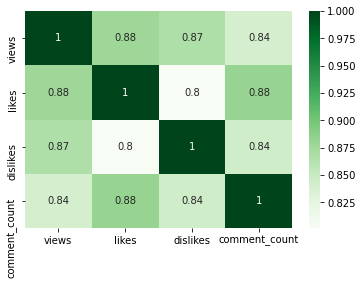

In [33]:
sns.heatmap(data=corr,cmap='Greens', annot=True)

### ex 5: צרו scatterplot להראות את שתי הקורלציות הכי חזקות שמצאתם בסעיף 3( במידה ויש תיקו, ביחרו שתיים מתוך ההכי חזקות(. 


<AxesSubplot:xlabel='views', ylabel='likes'>

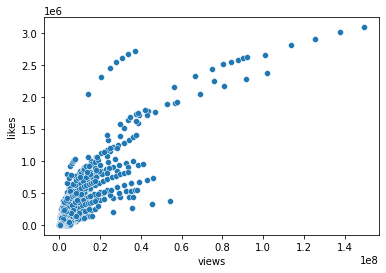

In [34]:
sns.scatterplot(data=yout_df, x='views', y='likes') 

### ex 6: 
הציגו את כמות הצפיות(views (בכל קטגוריה (id_category (עבור השנים 2018-2017 .אין 
להציג מידע נוסף )למשל- לא להציג גם את הצפיות ב2016 ,או את כמות ההערות(. רמז: תחילה
עליכם לחלץ את השנה ולשמור אותה בעמודה נפרדת. אחר כך מומלץ להשתמש ב table pivot

In [38]:
from datetime import date

yout_df['date'] = pd.to_datetime(yout_df.publish_time)

yout_df['year'] = pd.DatetimeIndex(yout_df.publish_time).year
yout_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,year
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01+00:00,2017
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00+00:00,2017
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12 19:05:24+00:00,2017
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13 11:00:04+00:00,2017
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41+00:00,2017


In [44]:
table1= yout_df.pivot_table('views', index='year', columns='category_id', aggfunc='sum') 
table1.loc[2017:2019]

category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
year,,,,,,,,,,,,,,,,
2017,865461513.0,78853521.0,4.504741e+09,144245930.0,381243186.0,54291438.0,50354420.0,701825770.0,1.130782e+09,4.049600e+09,235729643.0,798971191.0,202535856.0,500594905.0,154195.0,1751446.0
2018,144072937.0,8047346.0,8.398109e+08,32629265.0,61660329.0,7583452.0,84176667.0,67849434.0,1.971474e+08,6.453337e+08,48419659.0,89889352.0,48936175.0,85462155.0,229172.0,NaN
